# Optimization, Newton Methods, & Profit Maximization

### Import relevant packages

In [1]:
import sympy as sm
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

from optimization import newton_method, gradient_descent, constrained_newton_method, get_hessian, get_gradient

import statsmodels.api as stats

## Part 1: Basic Optimization Theory

### Gradient Descent

In [2]:
## Gradient Descent Visualization

x  = sm.symbols('x')

objective = 3*x**2 + 2*x - 24
symbols = [x]
x0 = {x:3}

x_star = gradient_descent(objective,symbols,x0,iterations=20)

Starting Values: [3]
Step 1: [1.]
Step 2: [0.2]
Step 3: [-0.12]
Step 4: [-0.248]
Step 5: [-0.2992]
Step 6: [-0.31968]
Step 7: [-0.327872]
Step 8: [-0.3311488]
Step 9: [-0.33245952]
Step 10: [-0.33298381]
Step 11: [-0.33319352]

Convergence Achieved (12 iterations): Solution = {x: -0.33327740928}


### Newton Method

In [28]:
## Optimization

x, y  = sm.symbols('x y')

objective = 100*(y-x**2)**2 + (1-x)**2
Gamma = [x,y]
Gamma0 = {x:-1.2,y:1}

NM_values = newton_method(objective,Gamma,Gamma0)

Starting Values: [-1.2  1. ]
Step 1: [-1.1752809   1.38067416]
Step 2: [ 0.76311487 -3.17503385]
Step 3: [0.76342968 0.58282478]
Step 4: [0.99999531 0.94402732]
Step 5: [0.9999957  0.99999139]

Convergence Achieved (6 iterations): Solution = {x: 0.9999999999999999, y: 0.9999999999814724}


In [20]:
NM_values[0].values()

dict_values([array([-1.2,  1. ]), array([-1.1752809 ,  1.38067416]), array([ 0.76311487, -3.17503385]), array([0.76342968, 0.58282478]), array([0.99999531, 0.94402732]), array([0.9999957 , 0.99999139]), array([1., 1.])])

## Part 2: Constrained Optimization Theory

### Lagrangian 

In [4]:
## Optimization

x, y, λ  = sm.symbols('x y λ')

Langrangian_objective = 100*(y-x**2)**2 + (1-x)**2 + λ*(x**2-y-2)
Gamma = [x,y,λ]
Gamma0 = {x:-1.2,y:1,λ:1}

L_values = newton_method(Langrangian_objective,Gamma,Gamma0)

Starting Values: [-1.2  1.   1. ]
Step 1: [  -1.17555556   -0.61866667 -400.        ]
Step 2: [   0.7677616   -5.1870237 -400.       ]
Step 3: [   0.76806868   -1.4100706  -400.        ]
Step 4: [   0.99999563   -1.05379886 -400.        ]
Step 5: [   0.999996   -1.000008 -400.      ]

Convergence Achieved (6 iterations): Solution = {x: 0.9999999999999999, y: -1.0000000000160152, λ: -400.0}


### Logarithmic Barrier Function

In [3]:
## Optimization

x, y, ρ = sm.symbols('x y ρ')

Barrier_objective = 100*(y-x**2)**2 + (1-x)**2 - ρ*sm.log((-x)*(y-3))
Gamma = [x,y,ρ] # Function requires last symbol to be rho!
Gamma0 = {x:-15,y:15,ρ:10}

barrier_values = constrained_newton_method(Barrier_objective,Gamma,Gamma0, mute=True)


 Overall Convergence Achieved (86 steps): Solution = {x: -1.7300082149986147, y: 3.0008175060422393}



### Putting them together

In [6]:
## Optimization

x, y, λ, ρ = sm.symbols('x y λ ρ')

combined_objective = 100*(y-x**2)**2 + (1-x)**2 + λ*(x**2-y-2) - ρ*sm.log((-x)*(y-3))
Gamma = [x,y,λ,ρ] # Function requires last symbol to be ρ!
Gamma0 = {x:-15,y:15,λ:0,ρ:10}

combined_values = constrained_newton_method(combined_objective,Gamma,Gamma0, mute=True)


 Overall Convergence Achieved (87 steps): Solution = {x: -2.236247356060529, y: 3.000802237482949, λ: -401.44706163498415}



## Part 3: Econometric Profit Maximization

In [31]:
def quantity_ar2_process(T, ϕ1, ϕ2, q0, q_1, ϵ, df, params):

    A = np.identity(T)  # The T x T identity matrix

    for i in range(T):

        if i-1 >= 0:
            A[i, i-1] = -ϕ1

        if i-2 >= 0:
            A[i, i-2] = -ϕ2

    b = np.array(df) @ params + ϵ

    b[0] = b[0] + ϕ1 * q0 + ϕ2 * q_1
    b[1] = b[1] + ϕ2 * q0

    return np.linalg.inv(A) @ b

In [32]:
df = pd.DataFrame()

## Digital Advertising - ln(δ) 
df['log_digital_advertising'] = np.log(np.random.normal(loc=50000,scale=15000,size=120).round())

## Television Advertising - ln(τ)
df['log_television_advertising'] = np.log(np.random.normal(loc=50000,scale=15000,size=120).round())

## Matrix X of covariates

# Lag Digital Advertising
df['log_digital_advertising_lag1'] = df['log_digital_advertising'].shift(1)
df['log_digital_advertising_lag2'] = df['log_digital_advertising'].shift(2)

# Lag Television Advertising
df['log_television_advertising_lag1'] = df['log_television_advertising'].shift(1)
df['log_television_advertising_lag2'] = df['log_television_advertising'].shift(2)

# Price
df['price'] = np.random.normal(loc=180,scale=15,size=120).round()
df['price_lag1'] = df['price'].shift(1)
df['price_lag2'] = df['price'].shift(2)

# Competitor Price
df['comp_price'] = np.random.normal(loc=120,scale=15,size=120).round()
df['comp_price_lag1'] = df['comp_price'].shift(1)
df['comp_price_lag2'] = df['comp_price'].shift(2)

# Seasonality 
from itertools import cycle

months = cycle(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
df['months'] = [next(months) for m in range(len(df))]

one_hot = pd.get_dummies(df['months'])
one_hot = one_hot[['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']]
df = df.join(one_hot).drop('months',axis=1)

## Constant
df['constant'] = 1

# Drop NaN (Two lags)
df = df.dropna()

df

,log_digital_advertising,log_television_advertising,log_digital_advertising_lag1,log_digital_advertising_lag2,log_television_advertising_lag1,log_television_advertising_lag2,price,price_lag1,price_lag2,comp_price,...,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,constant
2,10.229982,10.870719,10.910514,11.139831,10.917449,11.118875,189.0,180.0,181.0,130.0,...,0,0,0,0,0,0,0,0,0,1
3,10.291230,10.621693,10.229982,10.910514,10.870719,10.917449,185.0,189.0,180.0,113.0,...,1,0,0,0,0,0,0,0,0,1
4,10.959784,10.505834,10.291230,10.229982,10.621693,10.870719,191.0,185.0,189.0,121.0,...,0,1,0,0,0,0,0,0,0,1
5,11.101085,10.046072,10.959784,10.291230,10.505834,10.621693,175.0,191.0,185.0,137.0,...,0,0,1,0,0,0,0,0,0,1
6,10.861170,10.528195,11.101085,10.959784,10.046072,10.505834,162.0,175.0,191.0,116.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10.708020,10.950280,10.780455,10.885547,10.728825,10.779019,178.0,180.0,202.0,119.0,...,0,0,0,0,1,0,0,0,0,1
116,10.676370,10.988660,10.708020,10.780455,10.950280,10.728825,173.0,178.0,180.0,149.0,...,0,0,0,0,0,1,0,0,0,1
117,10.619936,10.791194,10.676370,10.708020,10.988660,10.950280,150.0,173.0,178.0,105.0,...,0,0,0,0,0,0,1,0,0,1
118,10.870947,11.389672,10.619936,10.676370,10.791194,10.988660,167.0,150.0,173.0,117.0,...,0,0,0,0,0,0,0,1,0,1


In [33]:
params = np.array(
    [10_000,
    5_000,
    2_000,
    1_000,
    3_000,
    1_000,
    -1_000,
    -500,
    -100,
    500,
    300,
    100,
    25_000,
    15_000,
    15_000,
    10_000,
    10_000,
    10_000,
    15_000,
    15_000,
    25_000,
    35_000,
    35_000,
    40_000,
    50_000
    ])

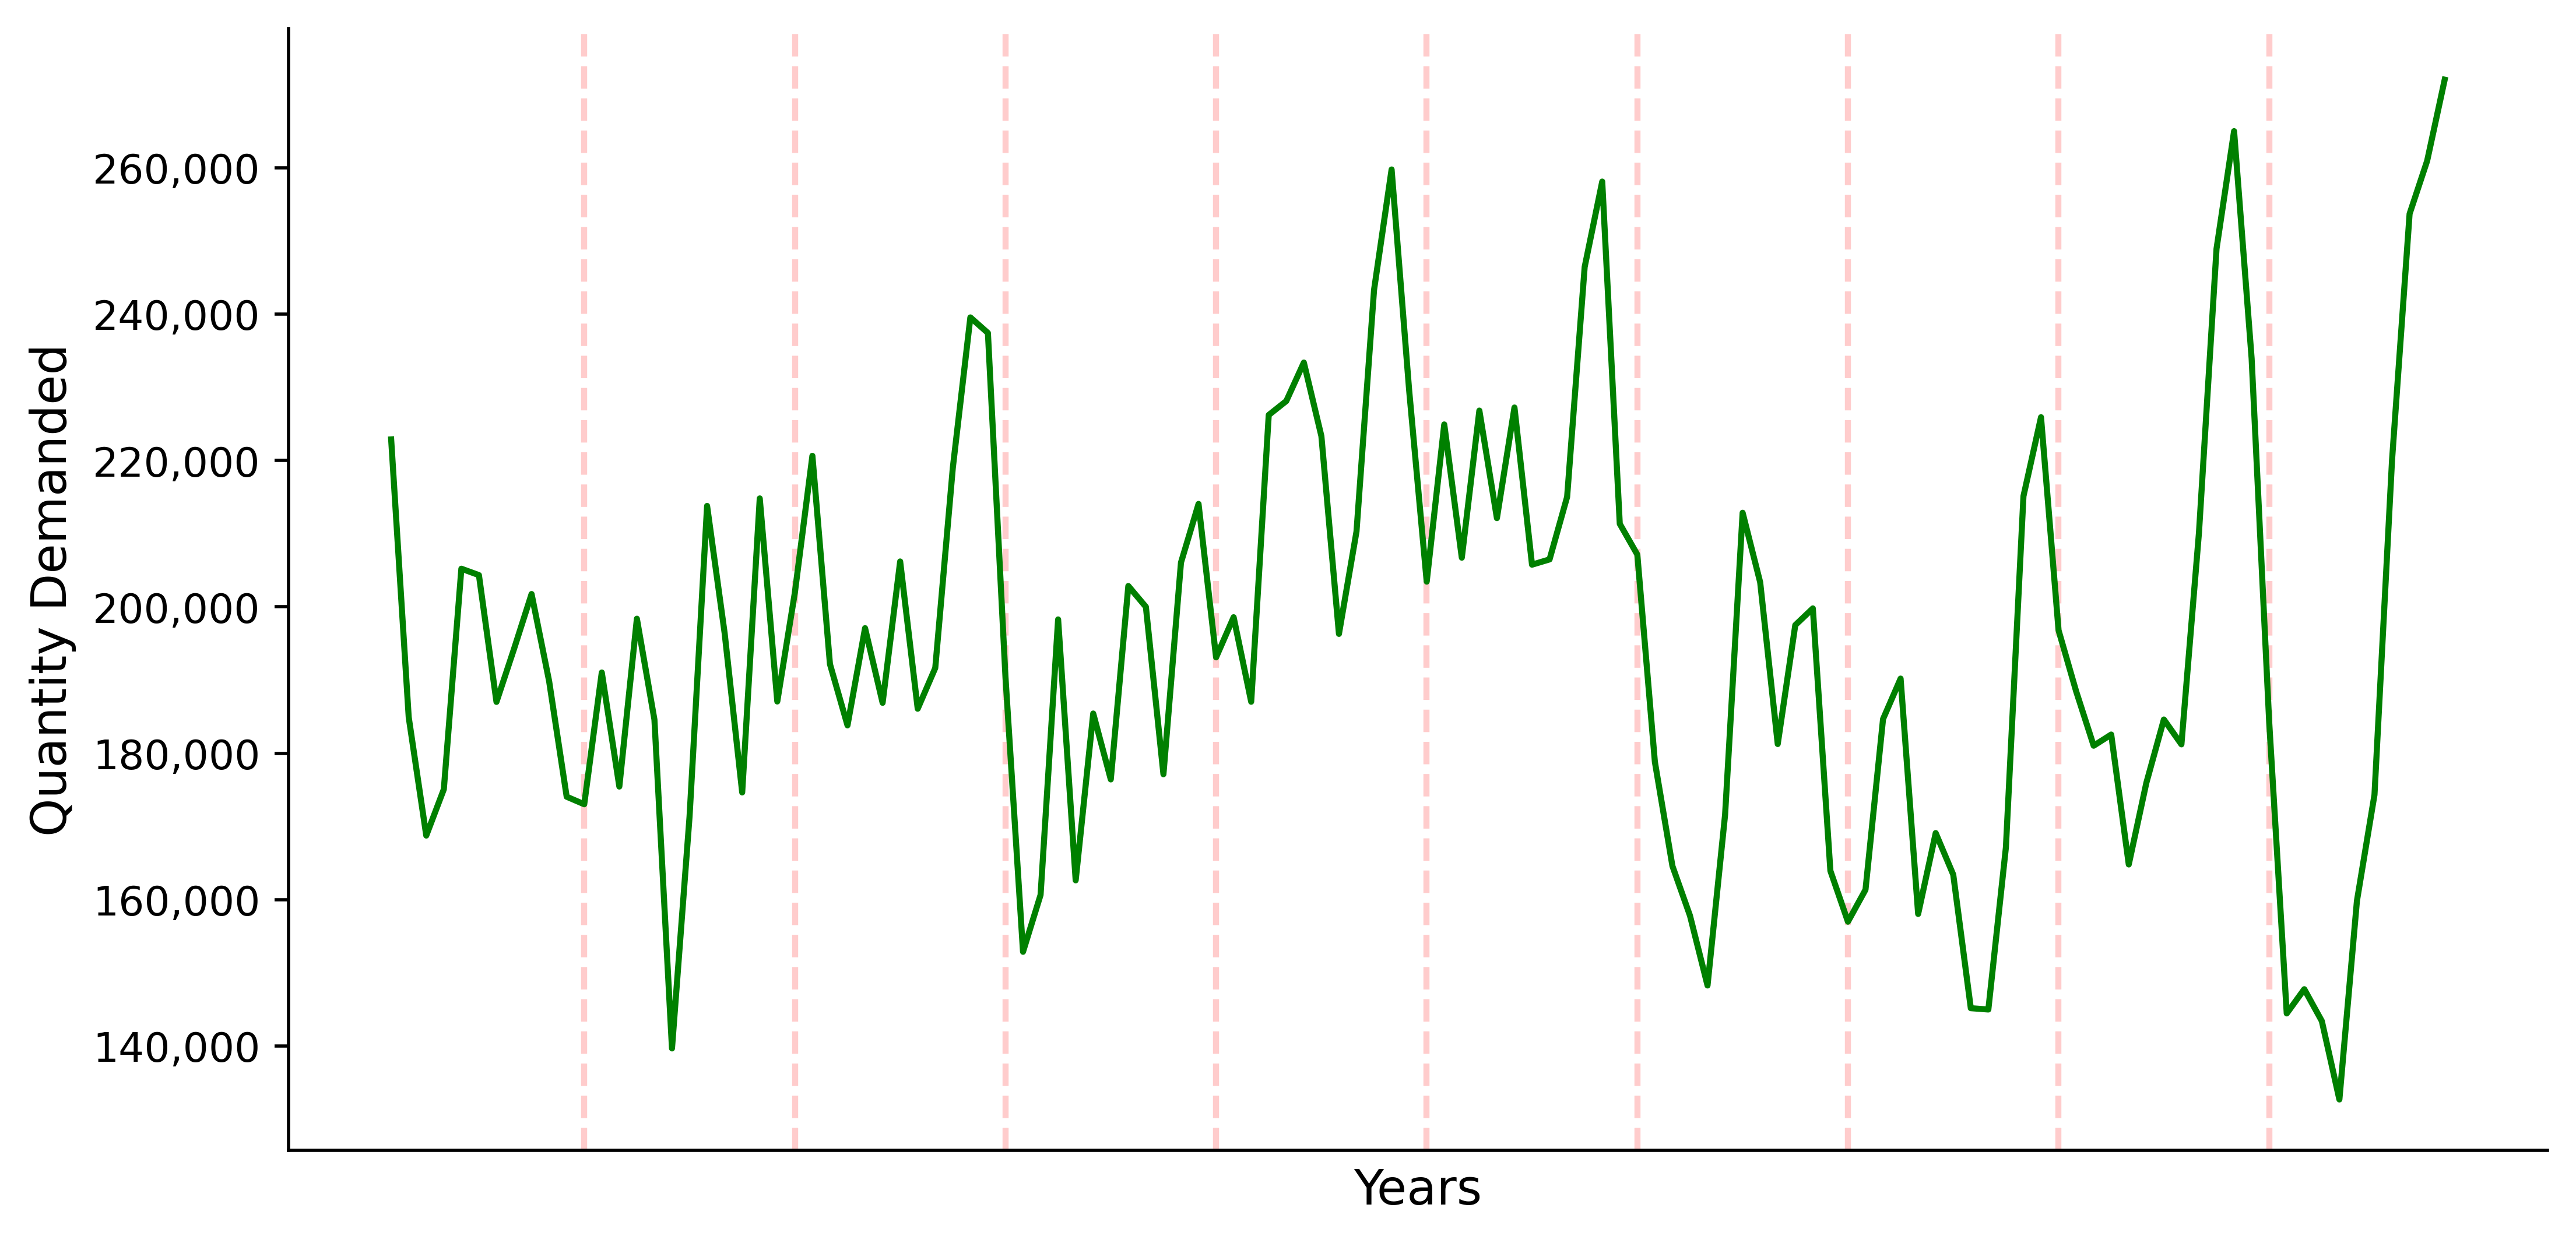

In [34]:
## Quantity Demand AR(2) component process

# parameters
T = 118
ϕ1 = 0.3
ϕ2 = 0.05
q0 = 300_000
q_1 = 250_000
ϵ = np.random.normal(0, 5000, size=T)

quantity_demanded_ar = quantity_ar2_process(T,ϕ1,ϕ2,q0,q_1,ϵ,df,params)

avg_demand = np.mean(quantity_demanded_ar)

In [35]:
df['quantity_demanded'] = quantity_demanded_ar
df['quantity_demanded_lag1'] = df['quantity_demanded'].shift(1)
df['quantity_demanded_lag2'] = df['quantity_demanded'].shift(2)

df = df[2:]

In [36]:
df.columns

Index(['log_digital_advertising', 'log_television_advertising',
       'log_digital_advertising_lag1', 'log_digital_advertising_lag2',
       'log_television_advertising_lag1', 'log_television_advertising_lag2',
       'price', 'price_lag1', 'price_lag2', 'comp_price', 'comp_price_lag1',
       'comp_price_lag2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'constant', 'quantity_demanded',
       'quantity_demanded_lag1', 'quantity_demanded_lag2'],
      dtype='object')

### Fitting OLS using our numerical optimization tools, analytically, and using statsmodels

In [38]:
## Fit Model using our Tools

variablez = list(df.drop(['quantity_demanded','July'],axis=1).columns)
symbols = []

for i in variablez:
    i  = sm.symbols(f'{i}')
    symbols.append(i)

y = np.array(df['quantity_demanded'])
X = np.array(df.drop(['quantity_demanded','July'],axis=1))
β = np.array(symbols)

objective = (y - X@β).T @ (y - X@β) # Residual Sum of Squares
β0 = dict(zip(symbols,[0]*len(symbols))) # Initial guess (0 for all)

β_numerical = newton_method(objective,symbols,β0)

Starting Values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Step 1: [ 9.69412390e+03  4.81134752e+03  2.01572933e+03  8.55613105e+02
  6.28426525e+02  1.41952548e+03 -9.96456288e+02 -4.80920032e+02
 -5.59162980e+01  4.73163761e+02  3.20968632e+02  1.23373028e+02
  5.65513551e+03  5.37995209e+02 -1.45711243e+03 -6.44488554e+03
 -2.78533682e+03 -7.04836884e+03 -1.91821569e+03  1.00674713e+04
  2.07871640e+04  1.95626614e+04  2.61610394e+04  6.99509400e+04
  3.53363174e-01  4.00618254e-02]

Convergence Achieved (2 iterations): Solution = {log_digital_advertising: 9694.123899329239, log_television_advertising: 4811.347516920865, log_digital_advertising_lag1: 2015.7293305074204, log_digital_advertising_lag2: 855.6131051021466, log_television_advertising_lag1: 628.4265252877167, log_television_advertising_lag2: 1419.5254818269254, price: -996.456288149219, price_lag1: -480.92003150741994, price_lag2: -55.91629801386606, comp_price: 473.1637611524025, comp_price_lag1: 320.968632243

In [39]:
β_analytical = np.linalg.inv(X.T @ X) @ X.T @ y 

df_residuals = len(X)-len(β_analytical)
σ2 = 1/df_residuals*((y-X@β_analytical).T @ (y-X@β_analytical)) # MSE 
Σ =  σ2 * np.linalg.inv(X.T @ X)
standard_errors = np.sqrt(np.diag(Σ))

In [62]:
## Fit model

y = df['quantity_demanded']
X = df.drop(['quantity_demanded','July'],axis=1)

mod = stats.OLS(y,X)
results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      quantity_demanded   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           4.38e-66
Time:                        19:07:00   Log-Likelihood:                -1130.6
No. Observations:                 116   AIC:                             2313.
Df Residuals:                      90   BIC:                             2385.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
log_digita

In [41]:
ols_results = pd.DataFrame()

ols_results['variable'] = variablez
ols_results['β_numerical'] = list(β_numerical.values())
ols_results['β_analytical'] = β_analytical
ols_results['std_err_analytical'] = standard_errors
ols_results['β_statsmodels'] = list(results.params)
ols_results['std_err_statsmodels'] = list(results.bse)

ols_results = ols_results.set_index('variable')
ols_results

,β_numerical,β_analytical,std_err_analytical,β_statsmodels,std_err_statsmodels
variable,,,,,
log_digital_advertising,9694.123899,9694.123899,1348.351790,9694.123899,1348.351790
log_television_advertising,4811.347517,4811.347516,1462.687361,4811.347517,1462.687361
log_digital_advertising_lag1,2015.729331,2015.729330,1680.385395,2015.729331,1680.385395
log_digital_advertising_lag2,855.613105,855.613105,1337.973080,855.613105,1337.973080
log_television_advertising_lag1,628.426525,628.426525,1550.975091,628.426525,1550.975091
log_television_advertising_lag2,1419.525482,1419.525482,1472.712516,1419.525482,1472.712516
price,-996.456288,-996.456288,29.533674,-996.456288,29.533674
price_lag1,-480.920032,-480.920032,104.350015,-480.920032,104.350015
price_lag2,-55.916298,-55.916298,56.692157,-55.916298,56.692157


In [63]:
# Build Symbolic Functions with all variables in function
δ, τ, λ, ρ  = sm.symbols('δ τ λ ρ')


price = 180
comp_price = 120
Jan = 1

## Obtain Lagged Values
log_digital_advertising_lag1 = df['log_digital_advertising_lag1'].iloc[-1]
log_digital_advertising_lag2 = df['log_digital_advertising_lag2'].iloc[-2]
log_television_advertising_lag1 = df['log_television_advertising_lag1'].iloc[-1]
log_television_advertising_lag2 = df['log_television_advertising_lag2'].iloc[-2]
price_lag1 = df['price_lag1'].iloc[-1]
price_lag2 = df['price_lag2'].iloc[-2]
comp_price_lag1 = df['comp_price_lag1'].iloc[-1]
comp_price_lag2 = df['comp_price_lag2'].iloc[-2]
quantity_demanded_lag1 = df['quantity_demanded_lag1'].iloc[-1]
quantity_demanded_lag2 = df['quantity_demanded_lag2'].iloc[-2]


vars = [sm.log(δ),
        sm.log(τ),
        log_digital_advertising_lag1,
        log_digital_advertising_lag2,
        log_television_advertising_lag1,
        log_television_advertising_lag2,
        price,
        price_lag1,
        price_lag2,
        comp_price,
        comp_price_lag1,
        comp_price_lag2,
        Jan,0,0,0,0,0,0,0,0,0,0, # All Months less July 
        1, # Constant
        quantity_demanded_lag1,
        quantity_demanded_lag2
        ]

params = np.array(results.params)

# Quantity
quantity_demanded = np.array([vars]) @ params
quantity_demanded = quantity_demanded[0]

In [64]:
print(quantity_demanded)

9694.12389936114*log(δ) + 4811.34751696583*log(τ) + 70679.6319246373


In [65]:
## Profit Function 
Revenue = price * quantity_demanded
Cost = quantity_demanded * (140 - 0.0001*quantity_demanded) + τ + δ
profit = Revenue - Cost

In [66]:
print(profit)

-δ - τ - (-0.969412389936114*log(δ) - 0.481134751696583*log(τ) + 132.932036807536)*(9694.12389936114*log(δ) + 4811.34751696583*log(τ) + 70679.6319246373) + 1744942.30188501*log(δ) + 866042.55305385*log(τ) + 12722333.7464347


In [67]:
## Optimization Problem

objective = -profit + λ*(τ + δ - 100_000) - ρ*sm.log((τ-20_000)*(δ-10_000))

symbols = [δ, τ, λ, ρ]
x0 = {δ:20_000, τ:80_000, λ:0, ρ:100000}

results = constrained_newton_method(objective,symbols,x0,iterations=1000,mute=True)


 Overall Convergence Achieved (159 steps): Solution = {δ: 66830.80840462173, τ: 33169.19159537827, λ: 11.43013602794416}



In [54]:
digital_ad = results[δ]
television_ad = results[τ]

quantity = quantity_demanded.evalf(subs={δ:digital_ad,τ:television_ad})
revenue = Revenue.evalf(subs={δ:digital_ad,τ:television_ad})
cost = Cost.evalf(subs={δ:digital_ad,τ:television_ad})
profit = revenue - cost

print(f"Quantity: {int(quantity):,}")
print(f"Total Revenue: ${round(revenue,2):,}")
print(f"Total Cost: ${round(cost,2):,}")
print(f"Profit: ${round(profit,2):,}")

Quantity: 228,463
Total Revenue: $41,123,465.40
Total Cost: $26,865,351.47
Profit: $14,258,113.94


## Visuals Pt. 1

### Cover Photo

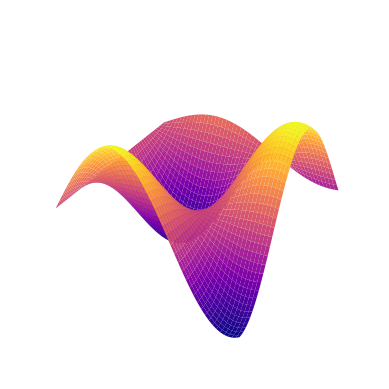

In [2]:
# Defining surface and axes
x = np.outer(np.linspace(0, 5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x)*np.cos(y)
 
# dpi=600,figsize=(10,10)
fig = plt.figure()
# fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.axis('off')
ax.grid(False)

plt.show()

In [7]:
def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation.save('Images/cover_rotation2.gif', dpi=75, writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


### Parabola Visual

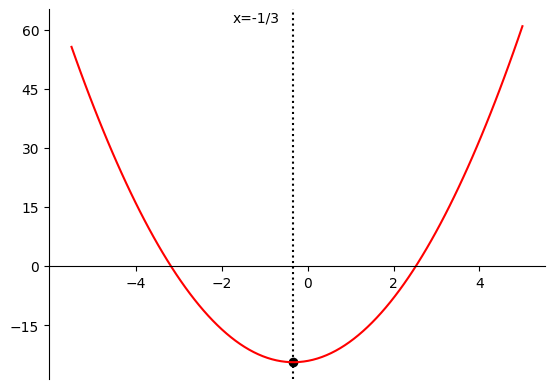

In [148]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.scatter(-1/3,  3*(-1/3)**2+2*(-1/3)-24, c='black')
plt.plot(x,y,'r')

# show the plot
plt.show()

### Gradient Descent Animation

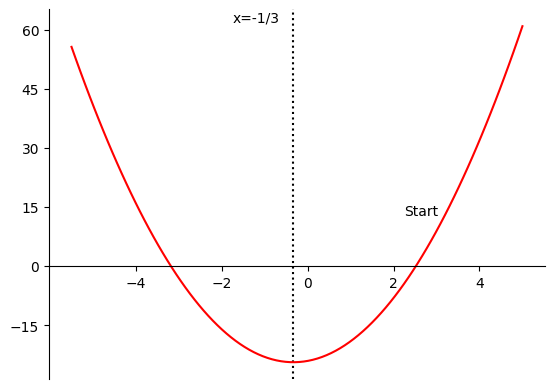

In [146]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre 
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.text(x=2.25,y=13,s="Start")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.plot(x,y,'r')

plt.show()

## Gradient Descent Animation

# x2=[]
# y2=[]

# def animate(iterations):
#     x2.append(float([v for v in GD_values[iterations].values()][0]))
#     y2.append(float(function.evalf(subs=GD_values[iterations])))
#     ax.scatter(x2, y2, c='black')

# rot_animation = animation.FuncAnimation(fig, animate, frames=len(GD_values),interval=500)

# rot_animation.save('Images/gradient_descent.gif', dpi=600)

### Rosenbrock's Parabolic Valley

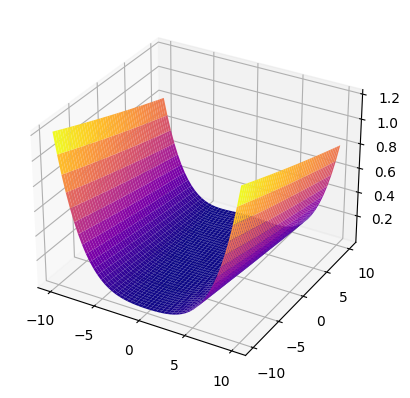

In [144]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.show()

# ## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/rotation.gif', dpi=100, writer='imagemagick')

### Newton Method Visualization

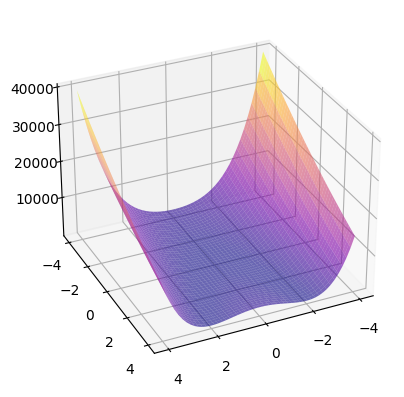

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

In [29]:
# ## Plot

# # Defining surface and axes
# x = np.outer(np.linspace(-4, 4, 50), np.ones(50))
# y = x.copy().T
# z = 100*(y-x**2)**2 + (1-x)**2
 
# fig = plt.figure()
# # syntax for 3-D plotting
# ax = plt.axes(projection ='3d')
# # ax.set_xticks([-10,-5,0,5,10])
# # ax.set_yticks([-10,-5,0,5,10])

# # syntax for plotting
# ax.plot_surface(x, y, z, cmap ='plasma',alpha=0.6)
# ax.view_init(elev=30, azim=65)

# plt.show()


# # ## Newton Method Animation

# # x2=[]
# # y2=[]
# # z2=[]

# # def animate(iterations):

# #     # Append & plot x and y values from optimization
# #     x2.append(float([v for v in NM_values[iterations].values()][0]))
# #     y2.append(float([v for v in NM_values[iterations].values()][1]))
# #     z2.append(float(function.evalf(subs=NM_values[iterations])))
# #     ax.scatter(x2, y2, z2, c='black')
# #     ax.plot(x2, y2, z2, c='black')

# # rot_animation = animation.FuncAnimation(fig, animate, frames=len(NM_values),interval=1000)

# # rot_animation.save('Images/newton_method2.gif', dpi=100)

## Visuals Pt. 2

### Equality Constrained Rosenbrock's Parabolic Valley

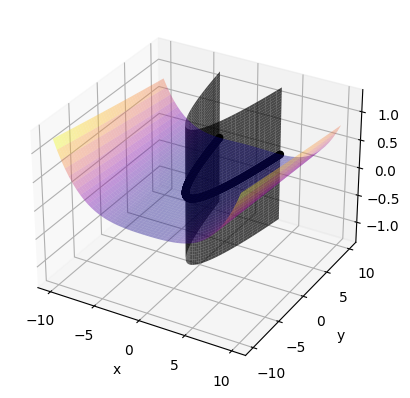

In [75]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2

# Constraint
xs = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
zs = np.linspace(-1.2e6, 1.2e6, 500)
X, Z = np.meshgrid(xs, zs)
Y = X**2 - 2

# Constraint Intersection
X2 = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
Y2 = X2**2 - 2
Z2 = 100*(Y2-X2**2)**2 + (1-X2)**2

# 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X, Y, Z,color='black',alpha=0.7,zorder=3)
ax.plot_surface(x, y, z, cmap='plasma',alpha=0.4,zorder=2)
ax.scatter(X2, Y2, Z2,color='black',alpha=1,zorder=3)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/equality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Inequality Constrained Rosenbrock's Parabolic Valley

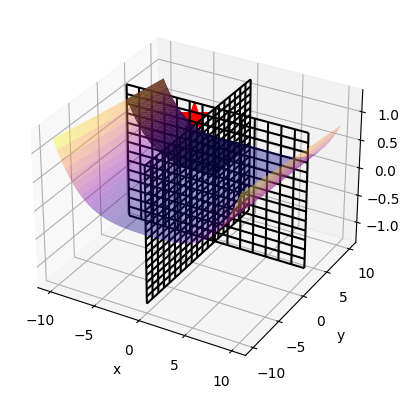

MovieWriter imagemagick unavailable; using Pillow instead.


In [74]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2

# Constraints 

# y >= 3
xc1 = np.linspace(-10, 10, 15)
zc1 = np.linspace(-1.2e6, 1.2e6, 15)
XC1, ZC1 = np.meshgrid(xc1, zc1)
YC1 = 3

# x <= 0
yc2 = np.linspace(-10, 10, 20)
zc2 = np.linspace(-1.2e6, 1.2e6, 20)
YC2, ZC2 = np.meshgrid(yc2, zc2)
XC2 = 0


# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(XC1, YC1, ZC1,color='black',alpha=1,zorder=3)
ax.plot_wireframe(XC2, YC2, ZC2,color='black',alpha=1,zorder=3)
ax.plot_surface(x, y, z, cmap='plasma',alpha=0.4,zorder=2)

feasible_region_x = [-5]
feasible_region_y = [7.5]
feasible_region_z = [0.5e6]

ax.scatter(feasible_region_x, feasible_region_y, feasible_region_z, c='red',marker='*',s=500,zorder=4)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/inequality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Logarithmic Barrier Function Examples

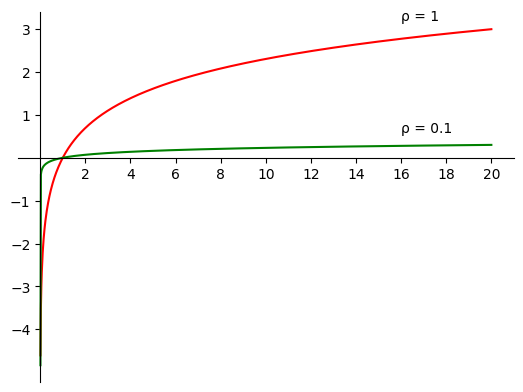

In [4]:
# Defining surface and axes
x = np.linspace(0.01, 20, 1000)
y = np.log(x)
x2 = np.linspace(0.000000000000000000001, 20, 1000)
y2 = 0.1*np.log(x2)

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_yticks([-4,-3,-2,-1,1,2,3])
ax.set_xticks([2,4,6,8,10,12,14,16,18,20])

ax.text(x=16,y=3.2,s="ρ = 1")
ax.text(x=16,y=0.6,s="ρ = 0.1")

# plot the function
plt.plot(x,y,'r')
plt.plot(x,y2,'g')

# show the plot
plt.show()

## Visuals Pt. 3

### Quantity Demanded

In [ ]:
fig, ax = plt.subplots() #figsize=(10,5), dpi=500)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['bottom'].set_position(('data',avg_demand))

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)      

for i in range(0,108,12):
    line = 108 - i
    ax.axvline(x=line, color='r', linestyle='--', alpha=0.2)

# ax.axhline(y=avg_demand, color='black', linewidth=0.2)

plt.plot(np.arange(T)+1, quantity_demanded_ar, color='g')
plt.xlabel('Years',size="large")
plt.ylabel('Quantity Demanded',size='large')

plt.show()

### Log Plot

In [ ]:
fig, ax = plt.subplots() #figsize=(10,5), dpi=500)

x = np.linspace(5, 100, 50)

y = np.log(x)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['bottom'].set_position(('data',avg_demand))

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)      
plt.tick_params(axis='y',which='both',bottom=False,top=False,left=False,labelleft=False)      

plt.scatter(x, y, color='g')
plt.xlabel('Digital Advertising',size="large")
plt.ylabel('Quantity Demanded',size='large')

plt.show()

### Profit Function

In [ ]:
## Plot

def log(x):
    return np.log(x)

# Defining surface and axes
τ = np.outer(np.linspace(0, 100000, 1000), np.ones(1000))
δ = np.outer(np.linspace(0, 100000, 1000), np.ones(1000)).T


profit_function = -δ - τ - (-0.969412389936114*log(δ) - 0.481134751696583*log(τ) + 132.932036807536)*(9694.12389936114*log(δ) + 4811.34751696583*log(τ) + 70679.6319246373) + 1744942.30188501*log(δ) + 866042.55305385*log(τ) + 12722333.7464347

fig = plt.figure() #figsize=(10,10))
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel(r'$\tau $', fontsize='xx-large')
ax.set_ylabel(r'$\delta $', fontsize='xx-large')
ax.set_zlabel(r'$\pi $', fontsize='xx-large')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick)

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

ax.zaxis.set_major_formatter(formatter)

# syntax for plotting
ax.plot_surface(τ, δ, profit_function, cmap ='plasma')

plt.show()

# Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/profit.gif', dpi=100, writer='imagemagick')